In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'covid_meetgegevens_export.tsv'
data = pd.read_table(file_path, sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PATIENT_ID          1616 non-null   float64
 1   MEETDATUM           1617 non-null   object 
 2   VCO2_MLMIN          1617 non-null   int64  
 3   EE_BEADEMINGSMACH   1617 non-null   float64
 4   VOEDING_ML24H       1594 non-null   float64
 5   MAAGRETENTIE_ML24H  1603 non-null   float64
 6   PROPOFOL_ML24H      1603 non-null   float64
 7   BUIKLIGGING         1603 non-null   object 
 8   ID                  1617 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 113.8+ KB


### In leven 3 en 6 maanden 

In het bestand covid_patienten_export.tsv is te zien dat in de laatste 2 kolommen "ja" of "nee" staat.
Deze kolommen gaan over of de patient op de 3 en 6 maanden mark nog in leven zijn.
zoals te zien is, is het altijd het geval dat als er bij kolom 3 maand "nee" staat dat er dan in de kolom 6 maand ook "nee" staat, logisch. Het is ook het geval dat als er in de eerste kolom "ja" staat dat er dan ook in de 2e kolom "ja" staat. Het is dus niet het geval dat er een "ja" bij de eerste kolom staat en een "nee" bij de 2e kolom staat. Aan deze kolommnen heb je dus in princiepe niks. De patient komt of binnen 3 maanden te overlijden of helemaal niet in 6 maanden. 


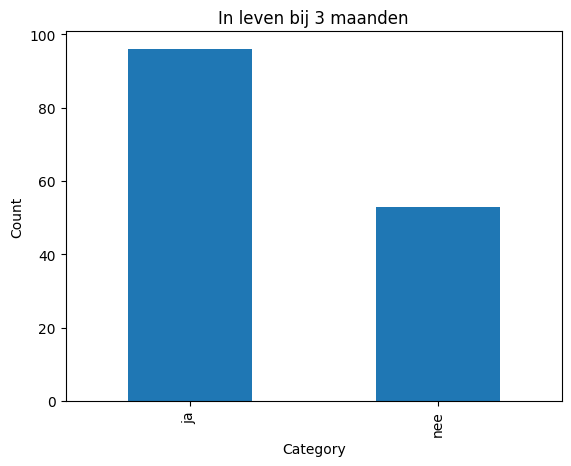

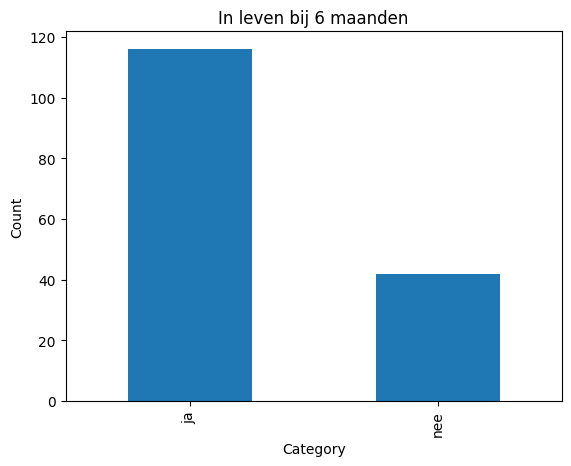

In [3]:


file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')

if 'IN_LEVEN_3_MAANDEN' in data_p.columns:
    
    counts = data_p['IN_LEVEN_3_MAANDEN'].value_counts()

   
    counts.plot(kind='bar')
    
    plt.title('In leven bij 3 maanden')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()
    
if 'IN_LEVEN_6_MAANDEN' in data_p.columns:
    data_p['IN_LEVEN_6_MAANDEN'] = data_p['IN_LEVEN_6_MAANDEN'].fillna('ja')


    counts = data_p['IN_LEVEN_6_MAANDEN'].value_counts()

    counts.plot(kind='bar')
    
    plt.title('In leven bij 6 maanden')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

### Maagretentie 
De kolom maagretentie bekijkt hoe snel het voedsel de maag weer verlaat, er is door de opdrachtgever om deze data buiten het onderzoek te laten. Dus deze kolom is leeg.

### APACHE SCORE

De apache score geeft de ernst van de prognose van een ziekte weer. Hoe hoger deze score hoe groter de ernst. 

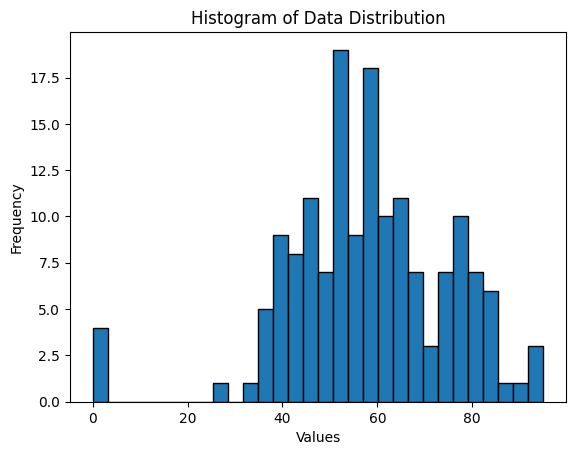

In [4]:
file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')

plt.hist(data_p['APACHE_IV_SCORE'], bins=30, edgecolor='black')
plt.title('Histogram of Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


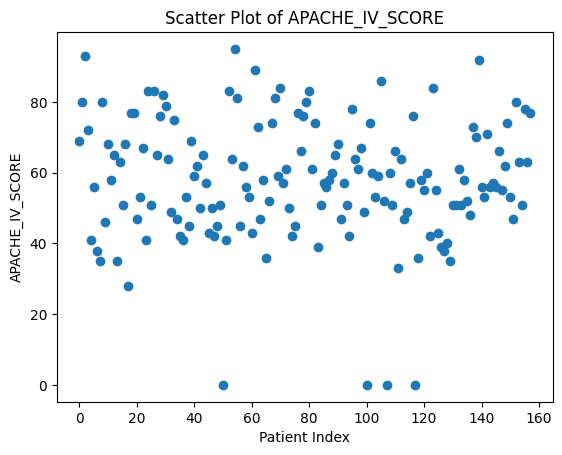

In [5]:


file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')

if 'APACHE_IV_SCORE' in data_p.columns:
    plt.scatter(data_p.index, data_p['APACHE_IV_SCORE'])
    plt.title('Scatter Plot of APACHE_IV_SCORE')
    plt.xlabel('Patient Index')
    plt.ylabel('APACHE_IV_SCORE')
    plt.show()

### APACHE score en de levend/dood status van de patient combineren.


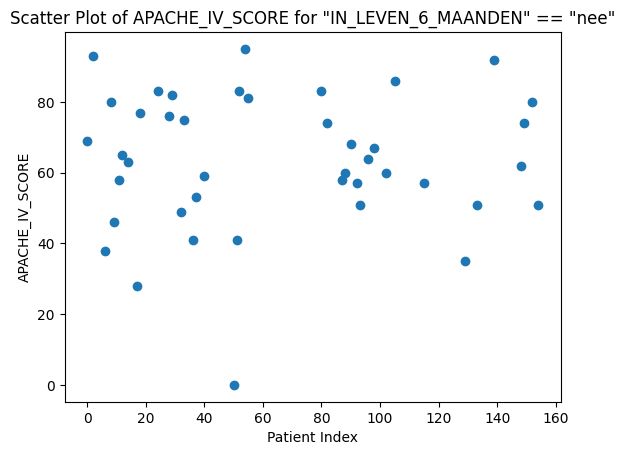

Average APACHE_IV_SCORE for "IN_LEVEN_6_MAANDEN" == "nee": 63.45238095238095


In [6]:


file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')
data_p['IN_LEVEN_6_MAANDEN'] = data_p['IN_LEVEN_6_MAANDEN'].fillna('ja')

filtered_data = data_p[data_p["IN_LEVEN_6_MAANDEN"] == "nee"]

plt.scatter(filtered_data.index, filtered_data['APACHE_IV_SCORE'])
plt.title('Scatter Plot of APACHE_IV_SCORE for "IN_LEVEN_6_MAANDEN" == "nee"')
plt.xlabel('Patient Index')
plt.ylabel('APACHE_IV_SCORE')
plt.show()

average_apache_score = filtered_data['APACHE_IV_SCORE'].mean()
print(f'Average APACHE_IV_SCORE for "IN_LEVEN_6_MAANDEN" == "nee": {average_apache_score}')

### Leeftijd tegenover apache score 

In [7]:
file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')
from scipy.stats import spearmanr
import pandas as pd


data_p[['LEEFTIJD', 'APACHE_IV_SCORE']] = data_p[['LEEFTIJD', 'APACHE_IV_SCORE']].fillna(0)  
data_p[['LEEFTIJD', 'APACHE_IV_SCORE']] = data_p[['LEEFTIJD', 'APACHE_IV_SCORE']].replace([np.inf, -np.inf], 0)  


correlation, p_value = spearmanr(data_p['LEEFTIJD'], data_p['APACHE_IV_SCORE'])

print(f"Correlation between LEEFTIJD and APACHE_IV_SCORE: {correlation}")
print(f"P-value: {p_value}")




Correlation between LEEFTIJD and APACHE_IV_SCORE: 0.2948292251390119
P-value: 0.00016960323367335017


De p-value is onder de 0.05 dus er kan gesproken worden van een correlatie tussen de apache score en de leeftijd.

#### Visualisatie van APACHE tegenover leeftijd 

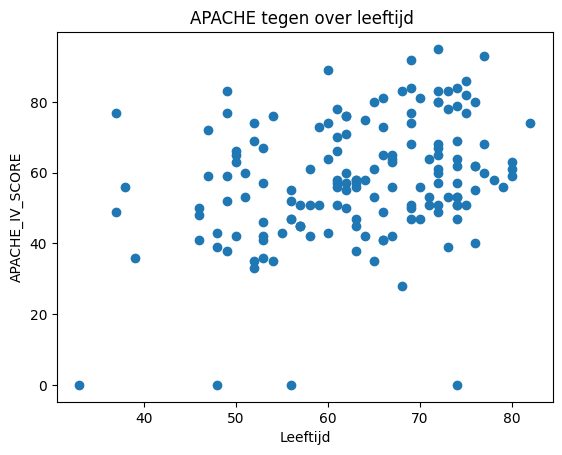

In [8]:
file_path = 'covid_patienten_export.tsv'
data_p = pd.read_table(file_path, sep='\t')

plt.scatter(data_p['LEEFTIJD'],data_p['APACHE_IV_SCORE'])
plt.title('APACHE tegen over leeftijd ')
plt.xlabel('Leeftijd')
plt.ylabel('APACHE_IV_SCORE')
plt.show()

Hierboven is de apache score tegenover de leeftijd geplot. 
Hieruit kan je concluderen dat er geen correlatie is.
Dit spreekt de p-value dus tegen.

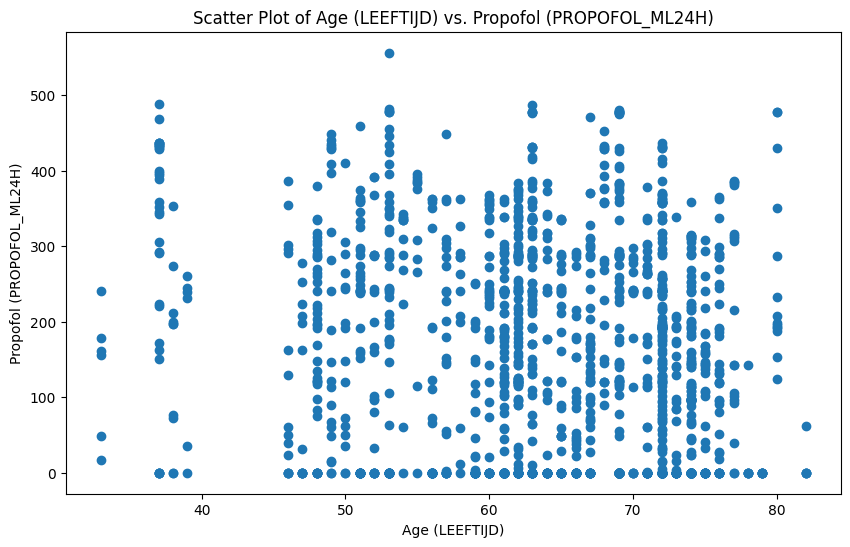

In [9]:

covid_patienten_data = pd.read_csv('covid_patienten_export.tsv', delimiter='\t')
covid_meetgegevens_data = pd.read_csv('covid_meetgegevens_export.tsv', delimiter='\t')

merged_data = pd.merge(covid_patienten_data, covid_meetgegevens_data, on='PATIENT_ID', how='inner')


plt.figure(figsize=(10, 6))

plt.scatter(merged_data['LEEFTIJD'], merged_data['PROPOFOL_ML24H'])
plt.title('Scatter Plot of Age (LEEFTIJD) vs. Propofol (PROPOFOL_ML24H)')
plt.xlabel('Age (LEEFTIJD)')
plt.ylabel('Propofol (PROPOFOL_ML24H)')


plt.show()
